# Functions for Processing
----

#### Note


In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json as js
from scipy.stats import linregress
from collections import Counter 

# Import API key - usng CBS keys - not used yet
#from api_keys import sport_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Input test file (JSON)
input_data_file='events.json'
# Output File (CSV)
output_data_file = "../output_data/eventsMaster.csv"


## Generate Events listing

In [6]:
with open(input_data_file) as f:
  data = js.load(f)
#gives a dictionary
#data.values()


In [7]:
import pprint
pp = pprint.PrettyPrinter(depth=4)
pp.pprint(data)


{'count': 706,
 'events': [{'contenttype': 'video',
             'continuousevent': False,
             'datetimecreated': 1617640343,
             'datetimeupdated': 1617640381,
             'endtime': 1618181100,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle': 'Demon Baseball vs Lamar',
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': '27a62c10-4a15-42ae-a81b-9b31c346ffb9/master/27a62c10-4a15-42ae-a81b-9b31c346ffb9',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/27a62c10-4a15-42ae-a81b-9b31c346ffb9/master/27a62c10-4a15-42ae-a81b-9b31c346ffb9.m3u8',
             'prismid': '27a62c10-4a15-42ae-a81b-9b31c346ffb9',
             'region': 'live-e',
             'retry': 0,
        

             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': 'a4c349cd-35c0-4b12-89a6-dff3c01baa14/master/a4c349cd-35c0-4b12-89a6-dff3c01baa14',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/a4c349cd-35c0-4b12-89a6-dff3c01baa14/master/a4c349cd-35c0-4b12-89a6-dff3c01baa14.m3u8',
             'prismid': 'a4c349cd-35c0-4b12-89a6-dff3c01baa14',
             'region': 'live-e',
             'retry': 0,
             'schedule': {'endtimestamp': 1618099200,
                          'starttimebuffer': 0,
                          'starttimestamp': 1618088100},
             'school': 'c-usa',
             'school_name': 'Conference USA',
             'source_id': '1dab7797-1970-43f9-bbeb-9bd9bb8a36fd',
             'source_name': 'SideArm',
             'sport': 'm-basebl',
             'sport_name': 'Baseball',
             'starttime': 1618088100,
       

             'endtime': 1617856200,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle': 'vs. Nicholls',
             'eventtype': 'game',
             'is_passthrough': True,
             'istest': False,
             'playbackUrl': 'https://learfield-ccbd.sidearmsports.com/93/smil:Louisiana3_adapt.smil/playlist.m3u8',
             'prismid': 'efd54398-4024-4524-a3a2-a207e644baec',
             'region': 'live-e',
             'related_tags': {'25802-1507041902': 'Entitlement : Sports Live : '
                                                  'College Sports Live Monthly',
                              '25802-1507041903': 'Entitlement : Sports Live : '
                                                  'College Sports Live Annual',
                              'target-site-sports-live': 'Target Site : Sports '
                    

             'continuousevent': False,
             'datetimecreated': 1613585184,
             'datetimeupdated': 1613585184,
             'endtime': 1618106400,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle': 'vs. Missouri',
             'eventtype': 'game',
             'is_passthrough': True,
             'istest': False,
             'playbackUrl': 'https://learfield-ccbd.sidearmsports.com/130/smil:SC1_adapt.smil/playlist.m3u8',
             'prismid': '2aa2046c-3c0e-4890-aa92-2f7f910ea7f6',
             'region': 'live-e',
             'related_tags': {'25802-1507041902': 'Entitlement : Sports Live : '
                                                  'College Sports Live Monthly',
                              '25802-1507041903': 'Entitlement : Sports Live : '
                                                  'College S

             'eventtitle': "SU Women's Tennis",
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': '5d5772ff-57d3-480d-89a2-7bac73b94778/master/5d5772ff-57d3-480d-89a2-7bac73b94778',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/5d5772ff-57d3-480d-89a2-7bac73b94778/master/5d5772ff-57d3-480d-89a2-7bac73b94778.m3u8',
             'prismid': '5d5772ff-57d3-480d-89a2-7bac73b94778',
             'region': 'live-e',
             'related_tags': {'25802-1507041902': 'Entitlement : Sports Live : '
                                                  'College Sports Live Monthly',
                              '25802-1507041903': 'Entitlement : Sports Live : '
                                                  'College Sports Live Annual',
                              'target-site-sports-live': 'Target Site : Sports '
                                 

             'eventtitle': 'Sports Nightly Audio',
             'eventtype': 'game',
             'is_passthrough': True,
             'istest': False,
             'playbackUrl': 'https://img.leanstream.co/IM6501-MP3',
             'prismid': 'c5f8eb2c-1faf-47d4-8e6a-96e6ff507874',
             'region': 'live-e',
             'retry': 0,
             'schedule': {'endtimestamp': 1617933600,
                          'starttimebuffer': 0,
                          'starttimestamp': 1617922800},
             'school': 'neb',
             'school_name': 'Nebraska',
             'source_id': '1dab7797-1970-43f9-bbeb-9bd9bb8a36fd',
             'source_name': 'SideArm',
             'sport': 'genrel',
             'sport_name': 'General',
             'starttime': 1617922800,
             'transcodeprofile': {'id': None, 'name': 'name'},
             'venue': 'venue',
             'video_status': 'DRAFT'},
            {'contenttype': 'video',
             'continuousevent': False,
       

             'schedule': {'endtimestamp': 1618020000,
                          'starttimebuffer': 0,
                          'starttimestamp': 1618008600},
             'school': 'pac',
             'school_name': 'Presidents Athletic Conference',
             'source_id': '1dab7797-1970-43f9-bbeb-9bd9bb8a36fd',
             'source_name': 'SideArm',
             'sport': 'm-soccer',
             'sport_name': "Men's Soccer",
             'starttime': 1618008600,
             'transcodeprofile': {'id': None, 'name': 'name'},
             'venue': 'venue',
             'video_status': 'LIVE'},
            {'contenttype': 'video',
             'continuousevent': False,
             'datetimecreated': 1617117058,
             'datetimeupdated': 1617117058,
             'endtime': 1618081200,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
             'eventstate': 'scheduled',
             'eventstatus': 'live',
             '

             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle': 'vs. Rice',
             'eventtype': 'game',
             'is_passthrough': True,
             'istest': False,
             'playbackUrl': 'https://learfield-ccbd.sidearmsports.com/21/smil:LaTech2_adapt.smil/playlist.m3u8',
             'prismid': 'bfef4f4b-c047-4355-a67e-a974e1c94680',
             'region': 'live-e',
             'related_tags': {'25802-1507041902': 'Entitlement : Sports Live : '
                                                  'College Sports Live Monthly',
                              '25802-1507041903': 'Entitlement : Sports Live : '
                                                  'College Sports Live Annual',
                              'target-site-sports-live': 'Target Site : Sports '
                                                         'Live'},
             'retry': 0,
             'schedule': {'endtimestamp': 1618102800,
                         

             'source_name': 'SideArm',
             'sport': 'c-fieldh',
             'sport_name': 'Field Hockey',
             'starttime': 1618000200,
             'transcodeprofile': {'id': None, 'name': 'name'},
             'venue': 'venue',
             'video_status': 'LIVE'},
            {'contenttype': 'video',
             'continuousevent': False,
             'datetimecreated': 1617483609,
             'datetimeupdated': 1617483609,
             'endtime': 1618084800,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle': "vs. Saint Joseph's University",
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': '9022ebe8-64d8-4bc5-b82f-7f15d508436b/master/9022ebe8-64d8-4bc5-b82f-7f15d508436b',
             'playbac

             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': '1de1bafa-4d31-406a-bb9b-0cd28c54748a/master/1de1bafa-4d31-406a-bb9b-0cd28c54748a',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/1de1bafa-4d31-406a-bb9b-0cd28c54748a/master/1de1bafa-4d31-406a-bb9b-0cd28c54748a.m3u8',
             'prismid': '1de1bafa-4d31-406a-bb9b-0cd28c54748a',
             'region': 'live-e',
             'related_tags': {'25802-1507041902': 'Entitlement : Sports Live : '
                                                  'College Sports Live Monthly',
                              '25802-1507041903': 'Entitlement : Sports Live : '
                                                  'College Sports Live Annual',
                              'target-site-sports-live': 'Target Site : Sports '
                                                         'Live'},
             'retry': 0,
             'schedule':

             'region': 'live-e',
             'related_tags': {'25802-1507041902': 'Entitlement : Sports Live : '
                                                  'College Sports Live Monthly',
                              '25802-1507041903': 'Entitlement : Sports Live : '
                                                  'College Sports Live Annual',
                              'target-site-sports-live': 'Target Site : Sports '
                                                         'Live'},
             'retry': 0,
             'schedule': {'endtimestamp': 1618088400,
                          'starttimebuffer': 0,
                          'starttimestamp': 1618071900},
             'school': 'rich',
             'school_name': 'University of Richmond',
             'source_id': '1dab7797-1970-43f9-bbeb-9bd9bb8a36fd',
             'source_name': 'SideArm',
             'sport': 'm-footbl',
             'sport_name': 'Football',
             'starttime': 1618071900,
            

             'transcodeprofile': {'id': None, 'name': 'name'},
             'venue': 'venue',
             'video_status': 'LIVE'},
            {'contenttype': 'audio',
             'continuousevent': False,
             'datetimecreated': 1613492121,
             'datetimeupdated': 1613766380,
             'endtime': 1618110000,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle': 'vs. Arkansas State',
             'eventtype': 'game',
             'is_passthrough': True,
             'istest': False,
             'playbackUrl': 'https://learfield-ccbd.sidearmsports.com/93/smil:Louisiana3_adapt.smil/playlist.m3u8',
             'prismid': 'fa66d682-50a1-4906-9825-200d848ee9d1',
             'region': 'live-e',
             'related_tags': {'25802-1507041902': 'Entitlement : Sports Live : '
                                         

             'sport_name': "Men's Soccer",
             'starttime': 1618068600,
             'transcodeprofile': {'id': None, 'name': 'name'},
             'venue': 'venue',
             'video_status': 'DRAFT'},
            {'contenttype': 'video',
             'continuousevent': False,
             'datetimecreated': 1612294424,
             'datetimeupdated': 1612294925,
             'endtime': 1618023600,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle': 'WSOC: UTSA vs North Texas',
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': 'f8f2d1fa-ecc9-4333-80fa-ade0ceadb51c/master/f8f2d1fa-ecc9-4333-80fa-ade0ceadb51c',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/f8f2d1fa-ecc9-433

             'venue': 'venue',
             'video_status': 'LIVE'},
            {'contenttype': 'video',
             'continuousevent': False,
             'datetimecreated': 1615869042,
             'datetimeupdated': 1615869042,
             'endtime': 1618261200,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle': 'DH vs. Stevens Tech',
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': 'e57fd9e6-24b4-409c-8fd4-915d2d0289c0/master/e57fd9e6-24b4-409c-8fd4-915d2d0289c0',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/e57fd9e6-24b4-409c-8fd4-915d2d0289c0/master/e57fd9e6-24b4-409c-8fd4-915d2d0289c0.m3u8',
             'prismid': 'e57fd9e6-24b4-409c-8fd4-915d2d0289c0',
             're

             'eventstatus': 'live',
             'eventtitle': 'Savannah State Baseball vs. Salem University',
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': '15c6270a-4a6e-4098-bf0a-8701dfafb83d/master/15c6270a-4a6e-4098-bf0a-8701dfafb83d',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/15c6270a-4a6e-4098-bf0a-8701dfafb83d/master/15c6270a-4a6e-4098-bf0a-8701dfafb83d.m3u8',
             'prismid': '15c6270a-4a6e-4098-bf0a-8701dfafb83d',
             'region': 'live-e',
             'related_tags': {'25802-1507041902': 'Entitlement : Sports Live : '
                                                  'College Sports Live Monthly',
                              '25802-1507041903': 'Entitlement : Sports Live : '
                                                  'College Sports Live Annual',
                              'target-site-sports-l

             'retry': 0,
             'schedule': {'endtimestamp': 1618016400,
                          'starttimebuffer': 0,
                          'starttimestamp': 1618007400},
             'school': 'patr',
             'school_name': 'Patriot League',
             'source_id': '1dab7797-1970-43f9-bbeb-9bd9bb8a36fd',
             'source_name': 'SideArm',
             'sport': 'w-soccer',
             'sport_name': "Women's Soccer",
             'starttime': 1618007400,
             'transcodeprofile': {'id': None, 'name': 'name'},
             'venue': 'venue',
             'video_status': 'DRAFT'},
            {'contenttype': 'video',
             'continuousevent': False,
             'datetimecreated': 1617631246,
             'datetimeupdated': 1617638099,
             'endtime': 1618095600,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
             'eventstate': 'scheduled',
             'eventstatus': 'live',
 

             'venue': 'venue',
             'video_status': 'DRAFT'},
            {'contenttype': 'video',
             'continuousevent': False,
             'datetimecreated': 1617640791,
             'datetimeupdated': 1617640791,
             'endtime': 1618168500,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle': 'BB vs. Rhodes',
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': '8395a69f-0d16-4cff-bebe-4d6f2e6a215a/master/8395a69f-0d16-4cff-bebe-4d6f2e6a215a',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/8395a69f-0d16-4cff-bebe-4d6f2e6a215a/master/8395a69f-0d16-4cff-bebe-4d6f2e6a215a.m3u8',
             'prismid': '8395a69f-0d16-4cff-bebe-4d6f2e6a215a',
             'region'

             'eventstatus': 'live',
             'eventtitle': 'Softball vs. Edinboro (Game One)',
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': 'fd37bf9a-0f77-428d-9045-a7b72a821c23/master/fd37bf9a-0f77-428d-9045-a7b72a821c23',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/fd37bf9a-0f77-428d-9045-a7b72a821c23/master/fd37bf9a-0f77-428d-9045-a7b72a821c23.m3u8',
             'prismid': 'fd37bf9a-0f77-428d-9045-a7b72a821c23',
             'region': 'live-e',
             'related_tags': {'25802-1507041902': 'Entitlement : Sports Live : '
                                                  'College Sports Live Monthly',
                              '25802-1507041903': 'Entitlement : Sports Live : '
                                                  'College Sports Live Annual',
                              'target-site-sports-live': 'Targe

             'region': 'live-e',
             'related_tags': {'25802-1507041902': 'Entitlement : Sports Live : '
                                                  'College Sports Live Monthly',
                              '25802-1507041903': 'Entitlement : Sports Live : '
                                                  'College Sports Live Annual',
                              'target-site-sports-live': 'Target Site : Sports '
                                                         'Live'},
             'retry': 0,
             'schedule': {'endtimestamp': 1614364401,
                          'starttimebuffer': 0,
                          'starttimestamp': 1618069800},
             'school': 'savs',
             'school_name': 'Savannah State University',
             'source_id': '1dab7797-1970-43f9-bbeb-9bd9bb8a36fd',
             'source_name': 'SideArm',
             'sport': 'm-basebl',
             'sport_name': 'Baseball',
             'starttime': 1618069800,
         

             'venue': 'venue',
             'video_status': 'LIVE'},
            {'contenttype': 'video',
             'continuousevent': False,
             'datetimecreated': 1617212658,
             'datetimeupdated': 1617212658,
             'endtime': 1617912000,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle': "Women's Soccer v Georgetown",
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': '521fcee0-9a34-4a60-818d-1cfee91b8fab/master/521fcee0-9a34-4a60-818d-1cfee91b8fab',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/521fcee0-9a34-4a60-818d-1cfee91b8fab/master/521fcee0-9a34-4a60-818d-1cfee91b8fab.m3u8',
             'prismid': '521fcee0-9a34-4a60-818d-1cfee91b8fab',
        

             'eventtitle': 'Saint Vincent at Franciscan',
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': '3be0856e-0215-4b9a-9585-f0adc63da458/master/3be0856e-0215-4b9a-9585-f0adc63da458',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/3be0856e-0215-4b9a-9585-f0adc63da458/master/3be0856e-0215-4b9a-9585-f0adc63da458.m3u8',
             'prismid': '3be0856e-0215-4b9a-9585-f0adc63da458',
             'region': 'live-e',
             'related_tags': {'25802-1507041902': 'Entitlement : Sports Live : '
                                                  'College Sports Live Monthly',
                              '25802-1507041903': 'Entitlement : Sports Live : '
                                                  'College Sports Live Annual',
                              'target-site-sports-live': 'Target Site : Sports '
                       

                                                         'Live'},
             'retry': 0,
             'schedule': {'endtimestamp': 1617847200,
                          'starttimebuffer': 0,
                          'starttimestamp': 1617835200},
             'school': 'nwbr',
             'school_name': 'Newberry College',
             'source_id': '1dab7797-1970-43f9-bbeb-9bd9bb8a36fd',
             'source_name': 'SideArm',
             'sport': 'm-lacros',
             'sport_name': "Men's Lacrosse",
             'starttime': 1617835200,
             'transcodeprofile': {'id': None, 'name': 'name'},
             'venue': 'venue',
             'video_status': 'LIVE'},
            {'contenttype': 'audio',
             'continuousevent': False,
             'datetimecreated': 1611606786,
             'datetimeupdated': 1617640624,
             'endtime': 1617994800,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
          

             'eventstatus': 'live',
             'eventtitle': 'MLAX v Villanova (10 APR 21) - Video',
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': 'e17d8f05-0f9d-44b9-830c-0986d524f18b/master/e17d8f05-0f9d-44b9-830c-0986d524f18b',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/e17d8f05-0f9d-44b9-830c-0986d524f18b/master/e17d8f05-0f9d-44b9-830c-0986d524f18b.m3u8',
             'prismid': 'e17d8f05-0f9d-44b9-830c-0986d524f18b',
             'region': 'live-e',
             'retry': 0,
             'schedule': {'endtimestamp': 1618091400,
                          'starttimebuffer': 0,
                          'starttimestamp': 1618077000},
             'school': 'denv',
             'school_name': 'University of Denver',
             'source_id': '1dab7797-1970-43f9-bbeb-9bd9bb8a36fd',
             'source_name': 'SideArm',
          

             'sport_name': 'Baseball',
             'starttime': 1618002900,
             'transcodeprofile': {'id': None, 'name': 'name'},
             'venue': 'venue',
             'video_status': 'DRAFT'},
            {'contenttype': 'video',
             'continuousevent': False,
             'datetimecreated': 1617633619,
             'datetimeupdated': 1617633659,
             'endtime': 1618110000,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle': 'FB vs. Lincoln',
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': '326b45c3-0758-4142-8470-66bd9b4efaa8/master/326b45c3-0758-4142-8470-66bd9b4efaa8',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/326b45c3-0758-4142-8470-66bd9b4e

             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle': 'Baseball vs Bowling Green',
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': '5251cd75-4da8-495a-99c5-112517169ed9/master/5251cd75-4da8-495a-99c5-112517169ed9',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/5251cd75-4da8-495a-99c5-112517169ed9/master/5251cd75-4da8-495a-99c5-112517169ed9.m3u8',
             'prismid': '5251cd75-4da8-495a-99c5-112517169ed9',
             'region': 'live-e',
             'retry': 0,
             'schedule': {'endtimestamp': 1618097400,
                          'starttimebuffer': 0,
                          'starttimestamp': 1618084800},
             'school': 'cmu',
             'school_name': 'Central Michigan University',
             'source_id': '1dab7797-1970-43f9-bbeb-9bd9bb8a36fd',
             '

             'continuousevent': False,
             'datetimecreated': 1617640302,
             'datetimeupdated': 1617640364,
             'endtime': 1618181700,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle': 'Demon Baseball vs. Lamar',
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': '2849ef7f-3579-4371-ab08-ac4dd7386c3c/master/2849ef7f-3579-4371-ab08-ac4dd7386c3c',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/2849ef7f-3579-4371-ab08-ac4dd7386c3c/master/2849ef7f-3579-4371-ab08-ac4dd7386c3c.m3u8',
             'prismid': '2849ef7f-3579-4371-ab08-ac4dd7386c3c',
             'region': 'live-e',
             'related_tags': {'25802-1507041902': 'Entitlement : Sports Live : '
   

             'region': 'live-e',
             'related_tags': {'25802-1507041902': 'Entitlement : Sports Live : '
                                                  'College Sports Live Monthly',
                              '25802-1507041903': 'Entitlement : Sports Live : '
                                                  'College Sports Live Annual',
                              'target-site-sports-live': 'Target Site : Sports '
                                                         'Live'},
             'retry': 0,
             'schedule': {'endtimestamp': 1618167660,
                          'starttimebuffer': 0,
                          'starttimestamp': 1618155000},
             'school': 'gu',
             'school_name': 'Georgetown University',
             'source_id': '1dab7797-1970-43f9-bbeb-9bd9bb8a36fd',
             'source_name': 'SideArm',
             'sport': 'w-lacros',
             'sport_name': "Women's Lacrosse",
             'starttime': 1618155000,
       

             'schedule': {'endtimestamp': 1618095600,
                          'starttimebuffer': 0,
                          'starttimestamp': 1618083600},
             'school': 'cose',
             'school_name': 'Cornerstone University',
             'source_id': '1dab7797-1970-43f9-bbeb-9bd9bb8a36fd',
             'source_name': 'SideArm',
             'sport': 'm-basebl',
             'sport_name': 'Baseball',
             'starttime': 1618083600,
             'transcodeprofile': {'id': None, 'name': 'name'},
             'venue': 'venue',
             'video_status': 'DRAFT'},
            {'contenttype': 'video',
             'continuousevent': False,
             'datetimecreated': 1615954218,
             'datetimeupdated': 1616009048,
             'endtime': 1618091100,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle

            {'contenttype': 'video',
             'continuousevent': False,
             'datetimecreated': 1617635966,
             'datetimeupdated': 1617635966,
             'endtime': 1618110000,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle': 'NJIT vs Stony Brook',
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': '1799f2a8-82a9-41e5-a32f-2d7c650ec637/master/1799f2a8-82a9-41e5-a32f-2d7c650ec637',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/1799f2a8-82a9-41e5-a32f-2d7c650ec637/master/1799f2a8-82a9-41e5-a32f-2d7c650ec637.m3u8',
             'prismid': '1799f2a8-82a9-41e5-a32f-2d7c650ec637',
             'region': 'live-e',
             'retry': 0,
             'schedule': {'

             'is_passthrough': True,
             'istest': False,
             'playbackUrl': 'https://learfield-ccbd.sidearmsports.com/22/smil:louisville1_adapt.smil/playlist.m3u8',
             'prismid': '47c82ebc-9d05-4649-ae33-eaa339cff8ae',
             'region': 'live-e',
             'retry': 0,
             'schedule': {'endtimestamp': 1617768000,
                          'starttimebuffer': 0,
                          'starttimestamp': 1617745800},
             'school': 'lou',
             'school_name': 'University of Louisville',
             'source_id': '1dab7797-1970-43f9-bbeb-9bd9bb8a36fd',
             'source_name': 'SideArm',
             'sport': 'm-basebl',
             'sport_name': 'Baseball',
             'starttime': 1617745800,
             'transcodeprofile': {'id': None, 'name': 'name'},
             'venue': 'venue',
             'video_status': 'LIVE'},
            {'contenttype': 'audio',
             'continuousevent': False,
             'datetimecre

             'datetimeupdated': 1613745792,
             'endtime': 1618164000,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle': 'Softball vs. Ashland (Game One)',
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': '88660704-48d2-42b5-ac1c-27a640d5d591/master/88660704-48d2-42b5-ac1c-27a640d5d591',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/88660704-48d2-42b5-ac1c-27a640d5d591/master/88660704-48d2-42b5-ac1c-27a640d5d591.m3u8',
             'prismid': '88660704-48d2-42b5-ac1c-27a640d5d591',
             'region': 'live-e',
             'related_tags': {'25802-1507041902': 'Entitlement : Sports Live : '
                                                  'College Sports Live Monthly'

             'eventtype': 'game',
             'is_passthrough': True,
             'istest': False,
             'playbackUrl': 'https://learfield-ccbd.sidearmsports.com/64/smil:TexAMZONE_adapt.smil/playlist.m3u8',
             'prismid': '9d2d600f-c26a-4fd9-9236-d359fb3b2819',
             'region': 'live-e',
             'related_tags': {'25802-1507041902': 'Entitlement : Sports Live : '
                                                  'College Sports Live Monthly',
                              '25802-1507041903': 'Entitlement : Sports Live : '
                                                  'College Sports Live Annual',
                              'target-site-sports-live': 'Target Site : Sports '
                                                         'Live'},
             'retry': 0,
             'schedule': {'endtimestamp': 1617822000,
                          'starttimebuffer': 0,
                          'starttimestamp': 1617818700},
             'school': 'tam',
   

             'is_passthrough': False,
             'istest': False,
             'path': 'a93d48ac-0410-4f21-8afc-eeffc7fae6e5/master/a93d48ac-0410-4f21-8afc-eeffc7fae6e5',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/a93d48ac-0410-4f21-8afc-eeffc7fae6e5/master/a93d48ac-0410-4f21-8afc-eeffc7fae6e5.m3u8',
             'prismid': 'a93d48ac-0410-4f21-8afc-eeffc7fae6e5',
             'region': 'live-e',
             'retry': 0,
             'schedule': {'endtimestamp': 1618088400,
                          'starttimebuffer': 0,
                          'starttimestamp': 1618073700},
             'school': 'ndsu',
             'school_name': 'North Dakota State University',
             'source_id': '1dab7797-1970-43f9-bbeb-9bd9bb8a36fd',
             'source_name': 'SideArm',
             'sport': 'w-softbl',
             'sport_name': 'Softball',
             'starttime': 1618073700,
             'transcodeprofile': {'id': None, 'name': 'name'},
       

             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle': 'vs. Sam Houston (Doubleheader)',
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': '56b1a4ef-a40d-4cb2-8c80-427ad96a18c3/master/56b1a4ef-a40d-4cb2-8c80-427ad96a18c3',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/56b1a4ef-a40d-4cb2-8c80-427ad96a18c3/master/56b1a4ef-a40d-4cb2-8c80-427ad96a18c3.m3u8',
             'prismid': '56b1a4ef-a40d-4cb2-8c80-427ad96a18c3',
             'region': 'live-e',
             'related_tags': {'25802-1507041902': 'Entitlement : Sports Live : '
                                                  'College Sports Live Monthly',
                              '25802-1507041903': 'Entitlement : Sports Live : '
                                                  'College Sports Live Annual',
                         

             'eventstatus': 'live',
             'eventtitle': 'Stanford vs. UC Davis',
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': '88a966f1-9898-42ab-847f-689dc03aa059/master/88a966f1-9898-42ab-847f-689dc03aa059',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/88a966f1-9898-42ab-847f-689dc03aa059/master/88a966f1-9898-42ab-847f-689dc03aa059.m3u8',
             'prismid': '88a966f1-9898-42ab-847f-689dc03aa059',
             'region': 'live-e',
             'retry': 0,
             'schedule': {'endtimestamp': 1618018200,
                          'starttimebuffer': 0,
                          'starttimestamp': 1618009200},
             'school': 'aeast',
             'school_name': 'America East Conference',
             'source_id': '1dab7797-1970-43f9-bbeb-9bd9bb8a36fd',
             'source_name': 'SideArm',
             'sport':

             'school': 'mtn',
             'school_name': 'Middle Tennessee State University',
             'source_id': '1dab7797-1970-43f9-bbeb-9bd9bb8a36fd',
             'source_name': 'SideArm',
             'sport': 'm-basebl',
             'sport_name': 'Baseball',
             'starttime': 1618080300,
             'transcodeprofile': {'id': None, 'name': 'name'},
             'venue': 'venue',
             'video_status': 'DRAFT'},
            {'contenttype': 'video',
             'continuousevent': False,
             'datetimecreated': 1617566449,
             'datetimeupdated': 1617566449,
             'endtime': 1618167600,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle': 'vs. UCF',
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest

             'eventstatus': 'live',
             'eventtitle': "Women's Tennis vs. Michigan St.",
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': '3936414d-a65b-4343-8dce-bb98defe6f33/master/3936414d-a65b-4343-8dce-bb98defe6f33',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/3936414d-a65b-4343-8dce-bb98defe6f33/master/3936414d-a65b-4343-8dce-bb98defe6f33.m3u8',
             'prismid': '3936414d-a65b-4343-8dce-bb98defe6f33',
             'region': 'live-e',
             'related_tags': {'25802-1507041902': 'Entitlement : Sports Live : '
                                                  'College Sports Live Monthly',
                              '25802-1507041903': 'Entitlement : Sports Live : '
                                                  'College Sports Live Annual',
                              'target-site-sports-live': 'Target

Need: 
'count'  - gives the number of events in the list
nested in 'count'
'events' - nested
 by 'contenttype'
     'eventstate' 'scheduled'
     'eventstatus' 'live'
     'eventtype' 'game'
     'is_passthrough' 'False'
     'prismid': '27a62c10-4a15-42ae-a81b-9b31c346ffb9',  [unique id]
     'schedule': {'endtimestamp': 1618181100,
                          'starttimebuffer': 0,
                          'starttimestamp': 1618163100},
     'school': 'nwst',
     'school_name': 'Northwestern State University',
     'sport': 'm-basebl',
     'sport_name': 'Baseball',



### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#another way to print

#pp.pprint(f'Dictionary comprehension: {data}')

In [9]:
data.keys()

dict_keys(['events', 'count'])

In [10]:
newDict={}
print(data['count'])
newCount=0
#filter out the passthrough records
Counts=data['count']
#first look for passthrough = True
for index in range(1,Counts):
    if data['events'][index]['is_passthrough']==False:
        newDict=data
        newCount= newCount+1
    
#print(newDict)    
print(f'filtered data counts {newCount}')

706
filtered data counts 558


In [11]:
ID=[]
Type=[]
Scheduled=[]
Status=[]
CType=[]
Pass=[]
Start=[]
End=[]
Event_Title=[]
School_Name=[]
School_Code=[]
Game=[]
PubPoint=[]


for index in range(1,newCount):
    try:
        ID.append(newDict['events'][index]['prismid'])
        Type.append(newDict['events'][index]['eventtype'])
        Scheduled.append(newDict['events'][index]['eventstate'])
        Status.append(newDict['events'][index]['eventstatus'])
        #CType.append(newDict['events'][index]['contenttype'])
        Pass.append(newDict['events'][index]['is_passthrough'])
        Start.append(newDict['events'][index]['starttime'])
        End.append(newDict['events'][index]['endtime'])
        Event_Title.append(newDict['events'][index]['eventtitle'])
        School_Name.append(newDict['events'][index]['school_name'])
        School_Code.append(newDict['events'][index]['school'])
        Game.append(newDict['events'][index]['sport_name'])
        #PubPoint.append(newDict['events'][index]['ingest']['primary']['pub_point'])
    except ValueError:
        continue
    except KeyError:
        print(index)
        continue
             
        
  
    
event_df=pd.DataFrame(ID)
event_df['Event type']=Type
event_df['Scheduled']=Scheduled
event_df['Is Live']=Status
#event_df['Content Type']=CType
event_df['PassThru']=Pass
event_df['Start Time']=Start
event_df['End Time']=End
event_df['Event']=Event_Title
event_df['School Name']=School_Name
event_df['School Code']=School_Code
event_df['Sport']=Game
#event_df['Access Point']=PubPoint
event_df.rename(columns={0:'ID'},inplace=True)
event_df.set_index('ID',inplace=True)



In [12]:
event_df

,Event type,Scheduled,Is Live,PassThru,Start Time,End Time,Event,School Name,School Code,Sport
ID,,,,,,,,,,
80454be6-1828-499d-b398-6c3b38f30a28,game,scheduled,live,False,1618008600,1618020000,SB: Middle Tennessee vs Marshall,Conference USA,c-usa,Softball
f9547332-f5d5-49e0-bc8f-63ec97466837,game,scheduled,live,False,1618073400,1618084800,vs. Ashland,Davenport University,dave,Baseball
cc6a38ff-0b50-4d79-b47f-320b77188954,game,scheduled,live,False,1618076700,1618110000,UWG Baseball vs. Union,University of West Georgia,wega,Baseball
bc057b3e-4358-4089-aea2-05ac0004396c,game,scheduled,live,False,1617822000,1617840000,Bethany at W&J,Presidents Athletic Conference,pac,Softball
1281a5f2-414e-4349-ab70-63900958ec47,game,scheduled,live,False,1618008600,1618020000,BSB AUDIO: Charlotte at FIU,Conference USA,c-usa,Baseball
...,...,...,...,...,...,...,...,...,...,...
a65b3462-a775-445e-b7d2-c330c4476fbe,game,scheduled,live,False,1617820200,1617836400,Men's Soccer vs. UConn,Providence College,prov,Men's Soccer
7ae76f4d-602a-42c9-b0cd-52915f71dcc2,game,scheduled,live,True,1618165800,1618185600,Baseball at Auburn,Mississippi State University,msst,Baseball
d986f7b6-fea3-4a03-ac1e-8dbfaef364af,game,scheduled,live,False,1617986700,1618002000,vs. Memphis,East Carolina University,ecu,Baseball


In [13]:
event_df.columns

Index(['Event type', 'Scheduled', 'Is Live', 'PassThru', 'Start Time',
       'End Time', 'Event', 'School Name', 'School Code', 'Sport'],
      dtype='object')

In [14]:
#output dataframe to CSV file
event_df.to_csv('events.csv')

In [15]:
#process for location lat/lng by School Name
#from api_keys import g_key

#school locations to come later this week

## College Popularity 

### Questions: 
* What colleges/universities are most frequently covered by CBS Sports? 
* How can college popularity determine best staffing pratices for CBS Audio/Video teams? 

### Relevant Variables: 
* Event 
* School Code 
* School Name

In [16]:
college_pop_df = event_df[["Event", "School Name", "School Code"]]
college_pop_df

,Event,School Name,School Code
ID,,,
80454be6-1828-499d-b398-6c3b38f30a28,SB: Middle Tennessee vs Marshall,Conference USA,c-usa
f9547332-f5d5-49e0-bc8f-63ec97466837,vs. Ashland,Davenport University,dave
cc6a38ff-0b50-4d79-b47f-320b77188954,UWG Baseball vs. Union,University of West Georgia,wega
bc057b3e-4358-4089-aea2-05ac0004396c,Bethany at W&J,Presidents Athletic Conference,pac
1281a5f2-414e-4349-ab70-63900958ec47,BSB AUDIO: Charlotte at FIU,Conference USA,c-usa
...,...,...,...
a65b3462-a775-445e-b7d2-c330c4476fbe,Men's Soccer vs. UConn,Providence College,prov
7ae76f4d-602a-42c9-b0cd-52915f71dcc2,Baseball at Auburn,Mississippi State University,msst
d986f7b6-fea3-4a03-ac1e-8dbfaef364af,vs. Memphis,East Carolina University,ecu


In [17]:
### Variable Counts

In [18]:
# school name within each conference or school
conference_detail_counts = college_pop_df["Event"].value_counts()
conference_detail_counts.head()

NDSU vs Western Illinois            5
vs. Missouri                        4
vs. Concordia University (Mich.)    4
vs. North Carolina                  4
vs. Lincoln Memorial University     4
Name: Event, dtype: int64

In [19]:
# The event count above shows that NDSU vs Western Illinois is the most popular event. However, this does not 
# determine college popularity. In order to determine popularity, we would need to separate the schools in the 
# event column. 

In [20]:
conference_detail_sc_counts = college_pop_df["School Code"].value_counts()
conference_detail_sc_counts.head()

patr     37
c-usa    31
aeast    19
pac      12
ggc      11
Name: School Code, dtype: int64

In [21]:
conference_detail_sn_counts = college_pop_df["School Name"].value_counts()
conference_detail_sn_counts.head()

Patriot League                    37
Conference USA                    31
America East Conference           19
Presidents Athletic Conference    12
Georgia Gwinnet College           11
Name: School Name, dtype: int64

In [22]:
# When counting the data by school code and school name, we see that these two variables are aligned. School code
# is essentially the abbreviation of the school name. 

### Challenge 1 - Conferences and Leagues: School Name and School Code Definitions

In [23]:
#data set is very fluid in the way it defines school name, and school code. 

In [24]:
#Count how many events have occured with each school
conference_counts =_counts = college_pop_df["School Name"].value_counts()
conference_counts.head()

Patriot League                    37
Conference USA                    31
America East Conference           19
Presidents Athletic Conference    12
Georgia Gwinnet College           11
Name: School Name, dtype: int64

In [25]:
#When attempting to find out how often schools are scheduled, we discover that conferences and league events 
#tend to be the most popular school names. We do see one college, Georgia Gwinnet College. However, because there
#are so many conferences, we must filter the actual events to see how often schools appear in CBS college sport 
#events.

### Data Focus - Event Column Data

### Challenge 2 - "At" or "Vs.": Event Descriptions 

In [26]:
# When reveiwing the event column of our dataset, we see that it (for the most part) includes both colleges. This
# column is the best option when attempting to determine college popularity. However, we do run into the issue of 
# how the events are described in the column. Here, we will split the event column to extract the college/uni
# names and count the items to determine popularity.

In [39]:
vs_at_split_df = college_pop_df["Event"].str.split(" at |vs.",n=1,expand=True).add_prefix("College/Uni_")
vs_at_split_df

,College/Uni_0,College/Uni_1
ID,,
80454be6-1828-499d-b398-6c3b38f30a28,SB: Middle Tennessee,Marshall
f9547332-f5d5-49e0-bc8f-63ec97466837,,Ashland
cc6a38ff-0b50-4d79-b47f-320b77188954,UWG Baseball,Union
bc057b3e-4358-4089-aea2-05ac0004396c,Bethany,W&J
1281a5f2-414e-4349-ab70-63900958ec47,BSB AUDIO: Charlotte,FIU
...,...,...
a65b3462-a775-445e-b7d2-c330c4476fbe,Men's Soccer,UConn
7ae76f4d-602a-42c9-b0cd-52915f71dcc2,Baseball,Auburn
d986f7b6-fea3-4a03-ac1e-8dbfaef364af,,Memphis


In [49]:
vs_at_zero_counts = vs_at_split_df["College/Uni_0"].value_counts()
vs_at_zero_counts.head()

             229
Baseball      18
Softball      17
Lafayette     10
NDSU           8
Name: College/Uni_0, dtype: int64

In [41]:
vs_at_one_counts = vs_at_split_df["College/Uni_1"].value_counts()
vs_at_one_counts.head()

FAU                 7
 USM                7
Franciscan          6
Western Illinois    5
Marshall            5
Name: College/Uni_1, dtype: int64

### Challenge 3 - Event Column Data Variations: Missing or Incorrect Data

### Three major event variations: 
* College A at College B
* College A vs College B
* Blank Data vs or at College B (College A listed in "School Name" where it belongs) 
* If two schools are listed in the event column, the "School Name" is most likely not a school name. 
* If the "School Name" is acutally listed correctly in the column, the event column most likely only has one college listed. 

In [42]:
# In this case, we will need to append the School Name column to the vs_at_split_df and fill in the column 0 
# blanks with the school name data. There are 229 instances where the fill will be needed. 

In [46]:
vs_at_split_df["School Name"] = college_pop_df["School Name"]
vs_at_split_df

,College/Uni_0,College/Uni_1,School Name
ID,,,
80454be6-1828-499d-b398-6c3b38f30a28,SB: Middle Tennessee,Marshall,Conference USA
f9547332-f5d5-49e0-bc8f-63ec97466837,,Ashland,Davenport University
cc6a38ff-0b50-4d79-b47f-320b77188954,UWG Baseball,Union,University of West Georgia
bc057b3e-4358-4089-aea2-05ac0004396c,Bethany,W&J,Presidents Athletic Conference
1281a5f2-414e-4349-ab70-63900958ec47,BSB AUDIO: Charlotte,FIU,Conference USA
...,...,...,...
a65b3462-a775-445e-b7d2-c330c4476fbe,Men's Soccer,UConn,Providence College
7ae76f4d-602a-42c9-b0cd-52915f71dcc2,Baseball,Auburn,Mississippi State University
d986f7b6-fea3-4a03-ac1e-8dbfaef364af,,Memphis,East Carolina University


### Additional Variations Found:
* Sport Type vs Collge B
* After exposing the blanks found when splitting the event column, we also find
* that the data in the first college column (College/Uni_0 or college A data) could also just be the 
* sport name, making an at least 40 additional rows of data inefficient. 

### Data Focus - College/Uni_0 Column 

In [ ]:
# with the College/Uni_0 variable counts seen below, we find that over 51% of the cells in the first column of the
# split event data are incorrect and inefficient.

In [50]:
vs_at_zero_counts

                                229
Baseball                         18
Softball                         17
Lafayette                        10
NDSU                              8
                               ... 
MLAX                              1
Women's Volleyball                1
Women's Lacrosse: Brockport       1
Baseball Press Conference         1
Spring Game                       1
Name: College/Uni_0, Length: 151, dtype: int64

In [ ]:
# To tackle the College/Uni_0 challenges, we will filter out the data and replace
# blanks and sport types within the column with school name data. 

In [54]:
filt = vs_at_split_df["College/Uni_0"] == ""
vs_at_split_df[filt]

,College/Uni_0,College/Uni_1,School Name
ID,,,
f9547332-f5d5-49e0-bc8f-63ec97466837,,Ashland,Davenport University
08b942cb-9ba0-4802-907b-09e67f9af910,,Texas State,Troy University
fc7a5d7d-eece-4c6b-8a77-0686d4f4ef23,,Hamline University,Macalester College
c9a74f78-8e1a-4508-872d-355da92ebc38,,Dixie State,Grand Canyon University
be217f96-f9ec-4543-ba95-8c2db8658b3d,,Mississippi State,"University of Tennessee, Knoxville"
...,...,...,...
ca2cd0d6-5209-4687-9bd7-938e50bd043c,,Texas State,Troy University
db1fc59e-9fd5-475e-98e5-1874cdcc0d22,,WHAC Tournament Final,Cornerstone University
0d5c53fd-6901-4f87-a1da-e331a6508664,,Concordia University (Mich.),Madonna University


In [57]:
filt = vs_at_split_df["College/Uni_0"] == ""
vs_at_split_df.loc[filt, "College/Uni_0"] = vs_at_split_df["School Name"]
vs_at_split_df

,College/Uni_0,College/Uni_1,School Name
ID,,,
80454be6-1828-499d-b398-6c3b38f30a28,SB: Middle Tennessee,Marshall,Conference USA
f9547332-f5d5-49e0-bc8f-63ec97466837,Davenport University,Ashland,Davenport University
cc6a38ff-0b50-4d79-b47f-320b77188954,UWG Baseball,Union,University of West Georgia
bc057b3e-4358-4089-aea2-05ac0004396c,Bethany,W&J,Presidents Athletic Conference
1281a5f2-414e-4349-ab70-63900958ec47,BSB AUDIO: Charlotte,FIU,Conference USA
...,...,...,...
a65b3462-a775-445e-b7d2-c330c4476fbe,Men's Soccer,UConn,Providence College
7ae76f4d-602a-42c9-b0cd-52915f71dcc2,Baseball,Auburn,Mississippi State University
d986f7b6-fea3-4a03-ac1e-8dbfaef364af,East Carolina University,Memphis,East Carolina University


In [63]:
college_uni_zero_counts = vs_at_split_df["College/Uni_0"].value_counts()
college_uni_zero_counts

Baseball                                18
Softball                                17
Lafayette                               10
NDSU                                     8
Newberry College                         8
                                        ..
Fresno State                             1
Lower Columbia College                   1
MLAX v Villanova (10 APR 21) - Video     1
Men's Lacrosse: Brockport                1
Indiana Institute of Technology          1
Name: College/Uni_0, Length: 218, dtype: int64

In [ ]:
# with the blank cells now being corrected, we now see more variables within the College/Uni_0 column, and more
# schools are now contending for the most popular college within the column. 

In [66]:
filt = vs_at_split_df["College/Uni_0"].str.contains("Baseball")
vs_at_split_df[filt]

,College/Uni_0,College/Uni_1,School Name
ID,,,
cc6a38ff-0b50-4d79-b47f-320b77188954,UWG Baseball,Union,University of West Georgia
8b601891-8a1d-4619-8b4d-c9dc3e352d78,Baseball,Butler,Seton Hall University
b8229a82-7ffb-4604-9027-739361066864,Baseball,Northwestern - Game 3,Rutgers University
284ff298-125d-4446-8bdd-3275bc21f048,Live Baseball,Oral Roberts (PREMIUM),Oklahoma
4ce33196-732b-41a5-a0b2-8f6bcda39934,Baseball,Northwestern - Game 1,Rutgers University
537f7f3f-c6ae-4aae-baa2-54bf276f0606,GGC Baseball,Webber International (Fla.),Georgia Gwinnet College
f63a16c7-1e7a-4e2f-8a81-23cb9a9b7d63,Baseball,Southern,Mississippi State University
27ee6274-7cae-4dd0-a9e2-2b1cda93e1cf,Demon Baseball,Lamar DH,Northwestern State University
360e586d-ee7b-4915-9c55-ab0eaa21747f,Demon Baseball,Lamar DH,Northwestern State University


In [67]:
filt = vs_at_split_df["College/Uni_0"].str.contains("Baseball")
vs_at_split_df.loc[filt, "College/Uni_0"] = vs_at_split_df["School Name"]
vs_at_split_df

,College/Uni_0,College/Uni_1,School Name
ID,,,
80454be6-1828-499d-b398-6c3b38f30a28,SB: Middle Tennessee,Marshall,Conference USA
f9547332-f5d5-49e0-bc8f-63ec97466837,Davenport University,Ashland,Davenport University
cc6a38ff-0b50-4d79-b47f-320b77188954,University of West Georgia,Union,University of West Georgia
bc057b3e-4358-4089-aea2-05ac0004396c,Bethany,W&J,Presidents Athletic Conference
1281a5f2-414e-4349-ab70-63900958ec47,BSB AUDIO: Charlotte,FIU,Conference USA
...,...,...,...
a65b3462-a775-445e-b7d2-c330c4476fbe,Men's Soccer,UConn,Providence College
7ae76f4d-602a-42c9-b0cd-52915f71dcc2,Mississippi State University,Auburn,Mississippi State University
d986f7b6-fea3-4a03-ac1e-8dbfaef364af,East Carolina University,Memphis,East Carolina University


In [68]:
college_uni_zero_two_counts = vs_at_split_df["College/Uni_0"].value_counts()
college_uni_zero_two_counts

Softball                      17
Lafayette                     10
NDSU                           8
Newberry College               8
Loras College                  7
                              ..
Marquette Men's Lacrosse       1
Men's Lacrosse: Brockport      1
New Hampshire                  1
Utah Valley University         1
Fordham                        1
Name: College/Uni_0, Length: 227, dtype: int64

In [69]:
filt = vs_at_split_df["College/Uni_0"].str.contains("Softball")
vs_at_split_df[filt]

,College/Uni_0,College/Uni_1,School Name
ID,,,
3aaca9fb-e1e9-4096-acfe-0e3869812464,GGC Softball,Truett-McConnell (Ga.) - Game 2,Georgia Gwinnet College
fe00b08b-4ec5-4443-8566-b2bc2fdf49e6,Softball,Cedarville (Game One),Wayne State University
5d32814b-dcdc-49e8-9a52-44f13b1b81d8,Azusa Pacific Softball,Chapman (Game Two),Azusa Pacific University
319a581d-1c0a-4e2e-973f-32ca653136e4,Softball,Northern Illinois,DePaul University
61f3616d-eb1a-4ab3-973b-890b7b975d29,UTA Softball,Georgia State,University of Texas at Arlington
3fe5af44-53b6-483c-952a-60ac6fcd6776,Softball,Illinois (DH),Nebraska
19f494f2-ec66-410b-a4c1-7c9bdf7a9c63,Azusa Pacific Softball,Chapman (Game One),Azusa Pacific University
5924239f-8089-49a6-ba5d-9f5ec6730678,UTA Softball,Texas,University of Texas at Arlington
b1040a47-4f25-48ca-83fa-f8ee10ba8c7e,Softball,Illinois,Nebraska


In [70]:
filt = vs_at_split_df["College/Uni_0"].str.contains("Softball")
vs_at_split_df.loc[filt, "College/Uni_0"] = vs_at_split_df["School Name"]
vs_at_split_df

,College/Uni_0,College/Uni_1,School Name
ID,,,
80454be6-1828-499d-b398-6c3b38f30a28,SB: Middle Tennessee,Marshall,Conference USA
f9547332-f5d5-49e0-bc8f-63ec97466837,Davenport University,Ashland,Davenport University
cc6a38ff-0b50-4d79-b47f-320b77188954,University of West Georgia,Union,University of West Georgia
bc057b3e-4358-4089-aea2-05ac0004396c,Bethany,W&J,Presidents Athletic Conference
1281a5f2-414e-4349-ab70-63900958ec47,BSB AUDIO: Charlotte,FIU,Conference USA
...,...,...,...
a65b3462-a775-445e-b7d2-c330c4476fbe,Men's Soccer,UConn,Providence College
7ae76f4d-602a-42c9-b0cd-52915f71dcc2,Mississippi State University,Auburn,Mississippi State University
d986f7b6-fea3-4a03-ac1e-8dbfaef364af,East Carolina University,Memphis,East Carolina University


In [71]:
college_uni_zero_three_counts = vs_at_split_df["College/Uni_0"].value_counts()
college_uni_zero_three_counts

Lafayette                     10
NDSU                           8
Newberry College               8
Loras College                  7
Cornerstone University         7
                              ..
Marquette Men's Lacrosse       1
Men's Lacrosse: Brockport      1
Utah Valley University         1
New Hampshire                  1
Fordham                        1
Name: College/Uni_0, Length: 228, dtype: int64

In [ ]:
# The College/Uni_0 data column has now been cleared of all blanks. The sport types that still remain would impact
# our ability to find the most popular college within the column. The top candidates are all listed as actual
# colleges/univiersities. We can now move on to determining what the most popular college is! 

### College Popularity - Official Count

In [72]:
vs_at_split_df

,College/Uni_0,College/Uni_1,School Name
ID,,,
80454be6-1828-499d-b398-6c3b38f30a28,SB: Middle Tennessee,Marshall,Conference USA
f9547332-f5d5-49e0-bc8f-63ec97466837,Davenport University,Ashland,Davenport University
cc6a38ff-0b50-4d79-b47f-320b77188954,University of West Georgia,Union,University of West Georgia
bc057b3e-4358-4089-aea2-05ac0004396c,Bethany,W&J,Presidents Athletic Conference
1281a5f2-414e-4349-ab70-63900958ec47,BSB AUDIO: Charlotte,FIU,Conference USA
...,...,...,...
a65b3462-a775-445e-b7d2-c330c4476fbe,Men's Soccer,UConn,Providence College
7ae76f4d-602a-42c9-b0cd-52915f71dcc2,Mississippi State University,Auburn,Mississippi State University
d986f7b6-fea3-4a03-ac1e-8dbfaef364af,East Carolina University,Memphis,East Carolina University


### Visualization
* College/Uni_0 Column Count

In [73]:
Official_College_Uni_Zero_Column_Counts = vs_at_split_df["College/Uni_0"].value_counts()
Official_College_Uni_Zero_Column_Counts

Lafayette                     10
NDSU                           8
Newberry College               8
Loras College                  7
Cornerstone University         7
                              ..
Marquette Men's Lacrosse       1
Men's Lacrosse: Brockport      1
Utah Valley University         1
New Hampshire                  1
Fordham                        1
Name: College/Uni_0, Length: 228, dtype: int64

<BarContainer object of 5 artists>

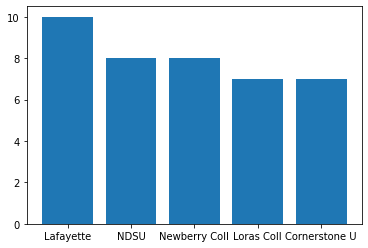

In [89]:
Colleges_Unis = ["Lafayette", "NDSU", "Newberry Coll", "Loras Coll", "Cornerstone U"]
CBS_Events = [10, 8, 8, 7, 7]

plt.bar(Colleges_Unis, CBS_Events)

### Visualization 
* College/Uni_1 Count

In [86]:
college_uni_zero_two_counts = vs_at_split_df["College/Uni_1"].value_counts()
college_uni_zero_two_counts

FAU                               7
 USM                              7
Franciscan                        6
Western Illinois                  5
Marshall                          5
                                 ..
 Mount Saint Mary College (NY)    1
 Gannon University                1
 Anderson University (SC)         1
 College of Saint Elizabeth       1
 Midway University                1
Name: College/Uni_1, Length: 305, dtype: int64

<BarContainer object of 5 artists>

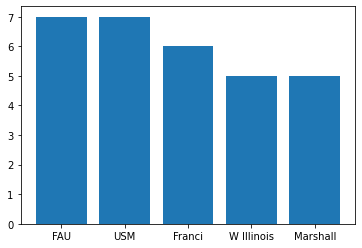

In [88]:
Colleges_Uni = ["FAU", "USM", "Franci", "W Illinois", "Marshall"]
CBS_Event = [7, 7, 6, 5, 5]

plt.bar(Colleges_Uni, CBS_Event)

## TOP 10 Colleges/Universities Most Frequently Covered by CBS Sports 

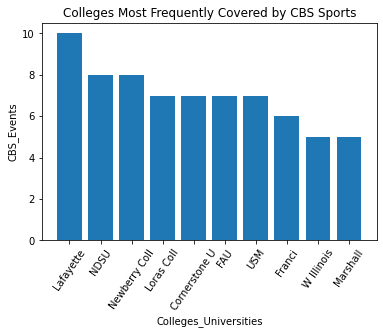

In [117]:
Colleges_Universities = ["Lafayette", "NDSU", "Newberry Coll", "Loras Coll", 
                         "Cornerstone U", "FAU", "USM", "Franci", "W Illinois", "Marshall"]
CBS_Event_Count = [10, 8, 8, 7, 7, 7, 7, 6, 5, 5]

plt.bar(Colleges_Universities, CBS_Event_Count)

plt.xticks(rotation=55, horizontalalignment="center")
plt.title("Colleges Most Frequently Covered by CBS Sports")
plt.xlabel("Colleges_Universities")
plt.ylabel("CBS_Events")

plt.show() 

## TOP Leagues/Conferences Most Frequently Covered by CBS 

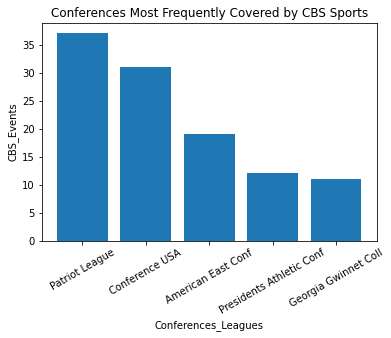

In [98]:
Conferences_Leagues = ["Patriot League", "Conference USA", "American East Conf", "Presidents Athletic Conf", 
                      "Georgia Gwinnet Coll"]
CBS_Event_Count = [37, 31, 19, 12, 11]

plt.bar(Conferences_Leagues, CBS_Event_Count)


plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Conferences Most Frequently Covered by CBS Sports")
plt.xlabel("Conferences_Leagues")
plt.ylabel("CBS_Events")

plt.show()

In [29]:
#Conference/League Conclusion 

# Georgia Gwinnet College appears to be the most popular college covered by CBS sports. This is due to the college
# appearing in the initial "School Name" value count. With 11 documented events, GWC does take the win. However, 
# Georgia Gwinnet College does not appear in the actual "Event" column breakdown. The highest college count in 
# regards to the "College_Uni_0 and College_Uni_1" columns is Lafayette with 10 documented CBS events. The absence 
# of GWC in the events column data could be due to the variation of sports actually played by GWC and documented 
# by CBS.

# If GWC is covered by CBS for smaller sports that only appear once, or have very unique event descriptions, 
# those events could have been overlooked. Blank cells, Baseball, and Softball events were the three factors I 
# explored to further clean the data. However, further exploration is encouraged in regards to Georgia Gwinnet. 

# When CBS coverage is explored, the actual college or university does not have much impact. Seasonal leagues and 
# conferences hold more weight. Using a full year of data to determine the most popular leagues and conferences would 
# be recommended over the evaluation of specific colleges. Building Audio/Visual teams based on season and league
# popularity would be ideal if considering schools when staffing. For example, the Patriot League and Conference USA would
# possibly require 2x the staff when compared to the Presidents Athletic conference or American East. 